## DC Neighborhood Clustering

In this notebook I'll cluster the different neighborhoods of DC according to several features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [2]:
df=pd.read_csv("../dc-residential-properties/DC2R.csv",index_col=0)

C:\Users\alehe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,3,11,12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.describe()

,BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,STORIES,PRICE,GBA,KITCHENS,FIREPLACES,LANDAREA
count,106661.000000,106661.000000,106661.000000,106661.000000,106420.000000,106617.000000,5.788400e+04,106661.000000,106660.000000,106661.000000,106661.000000
mean,2.031999,1.198076,7.378892,3.367323,1933.887061,2.074504,5.778388e+05,1711.415888,1.219164,0.620658,3363.419291
std,1.058463,0.596903,2.276789,1.094262,28.297563,0.435600,5.705639e+05,839.819476,0.621036,0.891658,3374.683408
min,0.000000,0.000000,0.000000,0.000000,1754.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,6.000000,3.000000,1914.000000,2.000000,2.400000e+05,1190.000000,1.000000,0.000000,1600.000000
50%,2.000000,1.000000,7.000000,3.000000,1930.000000,2.000000,4.400000e+05,1480.000000,1.000000,0.000000,2365.000000
75%,3.000000,1.000000,8.000000,4.000000,1947.000000,2.000000,7.500000e+05,1966.000000,1.000000,1.000000,4200.000000
max,13.000000,6.000000,37.000000,16.000000,2019.000000,9.000000,1.610000e+07,20948.000000,44.000000,13.000000,124980.000000


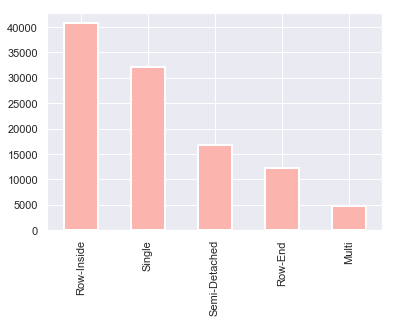

In [4]:
#Cleaning out some building types that are irrelevant.
df['STRUCT']=df['STRUCT'].astype(str)
df= df[~df.STRUCT.str.contains("nan")]
df= df[~df.STRUCT.str.contains("Default")]
df= df[~df.STRUCT.str.contains("Vacant Land")]
df= df[~df.STRUCT.str.contains(" ")]

#Visualize our distribution of building structures:
df['STRUCT'].value_counts().plot(kind='bar',linewidth=2,colormap='Pastel1') 

In [5]:
#Create new dataframe of aggregate values for each neighborhood
avgprice = pd.DataFrame(df.groupby('NBHD')['PRICE'].agg(np.mean), columns=['NBHD', 'PRICE'])
avggba = pd.DataFrame(df.groupby('NBHD')['GBA'].agg(np.mean), columns=['NBHD', 'GBA'])
avgfire = pd.DataFrame(df.groupby('NBHD')['FIREPLACES'].agg(np.mean), columns=['NBHD', 'FIREPLACES'])
avgyear= pd.DataFrame(df.groupby('NBHD')['AYB'].agg(np.mean), columns=['NBHD', 'AYB'])
avgland=pd.DataFrame(df.groupby('NBHD')['LANDAREA'].agg(np.mean), columns=['NBHD', 'LANDAREA'])
avgbath=pd.DataFrame(df.groupby('NBHD')['BATHRM'].agg(np.mean), columns=['NBHD', 'BATHRM'])
avgrooms=pd.DataFrame(df.groupby('NBHD')['ROOMS'].agg(np.mean), columns=['NBHD', 'ROOMS'])
df.NBHD=df.NBHD.dropna()
nbhds=pd.DataFrame(df['NBHD'].unique())
nbhds=nbhds.dropna()
print(nbhds.head())

                              0
0                       Berkley
1                 Spring Valley
2                   Chevy Chase
3                  Forest Hills
4  Massachusetts Avenue Heights


In [6]:
subdf= pd.DataFrame()
subdf['PRICE']=avgprice.PRICE
subdf['GBA']= avggba.GBA
subdf['FIREPLACES']= avgfire.FIREPLACES 
subdf['AYB']=avgyear.AYB
subdf['LANDAREA']=avgland.LANDAREA
subdf['BATHRM']=avgbath.BATHRM
subdf['ROOMS']=avgrooms.ROOMS
#subdf['NBHD']=nbhds
subdf=subdf.dropna()
print(len(subdf))

55


In [7]:
subdf.head()

,PRICE,GBA,FIREPLACES,AYB,LANDAREA,BATHRM,ROOMS
NBHD,,,,,,,
16th Street Heights,5.434893e+05,2050.021309,0.752410,1922.850178,3916.353120,2.191273,8.038559
American University,7.673000e+05,1849.878520,1.118958,1937.613311,4924.458596,2.197562,7.475830
Anacostia,2.384033e+05,1464.484904,0.090573,1933.065473,2560.638940,1.677141,7.105360
Barry Farms,2.399021e+05,1261.300283,0.082153,1946.005682,2968.150142,1.631728,6.756374
Berkley,1.588250e+06,3342.580645,1.840112,1964.169944,9871.486676,3.685835,9.680224


## What Characterizes a Neighborhood?
Let's inspect what characterizes a neighborhood through clustering and PCA.

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

data = pd.DataFrame(scale(subdf), columns=['PRICE', 'GBA', 'FIREPLACES', 'AYB', 'LANDAREA', 'BATHRM', 'ROOMS'])
pca = PCA(n_components=4).fit(data)
pca_samples= pca.transform(data)
print(data.head())

      PRICE       GBA  FIREPLACES       AYB  LANDAREA    BATHRM     ROOMS
0 -0.406391  0.090181   -0.205650 -0.814245 -0.160703 -0.207445  0.223462
1  0.040304 -0.189525    0.364783 -0.057121  0.186510 -0.198085 -0.258546
2 -1.015300 -0.728124   -1.235622 -0.290356 -0.627642 -0.972683 -0.575873
3 -1.012308 -1.012081   -1.248725  0.373280 -0.487286 -1.040276 -0.874799
4  1.678806  1.896572    1.487068  1.304830  1.890377  2.017069  1.629637


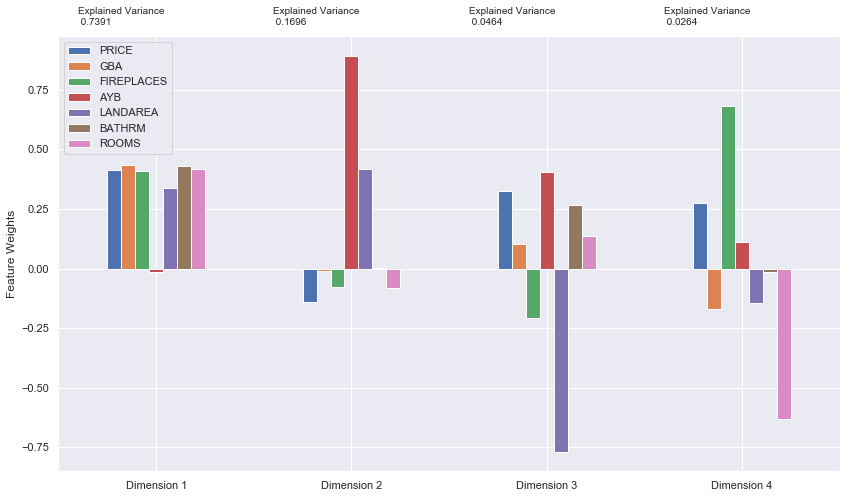

In [9]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(data, pca)

In [10]:
pca_results.cumsum()

,Explained Variance,PRICE,GBA,FIREPLACES,AYB,LANDAREA,BATHRM,ROOMS
Dimension 1,0.7391,0.4134,0.4341,0.4098,-0.0140,0.3382,0.4303,0.4159
Dimension 2,0.9087,0.2725,0.4252,0.3306,0.8768,0.7548,0.4307,0.3342
Dimension 3,0.9551,0.5962,0.5295,0.1248,1.2820,-0.0128,0.6955,0.4701
Dimension 4,0.9815,0.8721,0.3586,0.8060,1.3951,-0.1590,0.6811,-0.1594


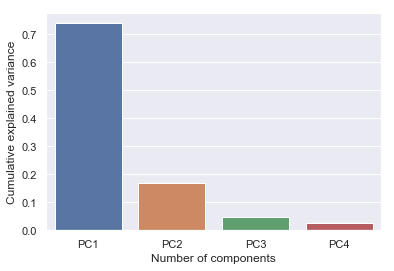

In [11]:
dfvar = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var",  
           data=dfvar);
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [12]:
pca = PCA(n_components=2).fit(data)
reduced_data = pca.transform(data)
pca_samples = pca.transform(data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [13]:
def biplot(data, reduced_data, pca):
    
    fig, ax = plt.subplots(figsize = (14,8))
    
    # scatterplot of the reduced data 
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # using scaling factors to make the arrows
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax


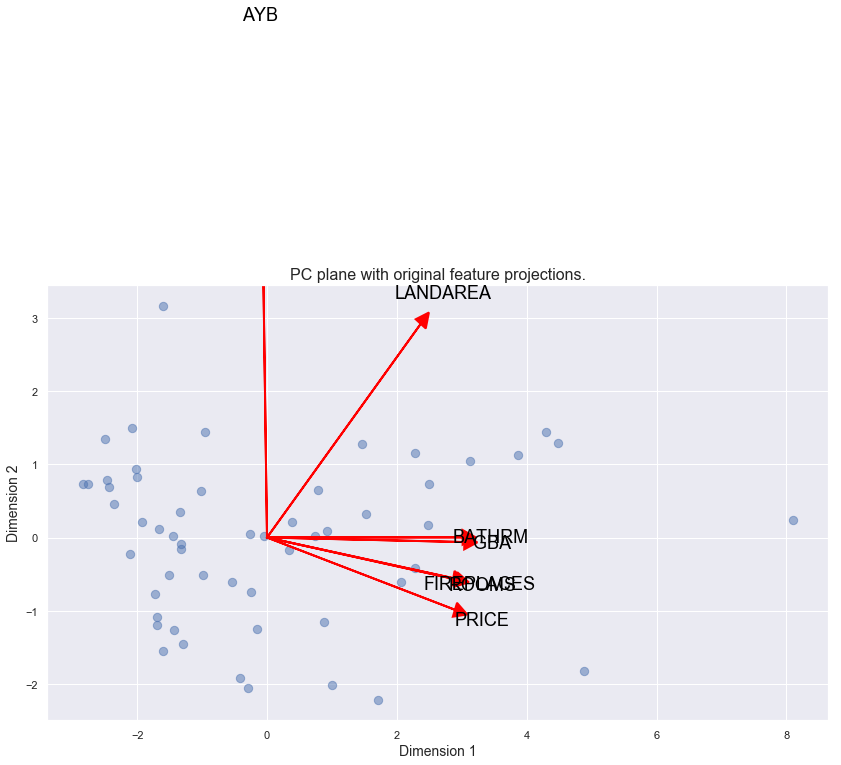

In [14]:
biplot(data, reduced_data, pca)

## Interpreting the Biplot

Clearly Year Built has a large influence on the weight in dimension 2, but almost none in the first dimension. 
This is consistent with the graph of feature weights above.

## Now to implement Hierarchical Clustering
KMeans is more efficient with large datasets, but if we have pared down our interesting data to 55 observations it's time to employ Hierarchical (Agglomerative) Clustering.

In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
# Standarize features
scaler = StandardScaler()
substd = scaler.fit_transform(subdf)

In [16]:
# Create meanshift object
clt = AgglomerativeClustering(linkage='ward', 
                              affinity='euclidean', 
                              n_clusters=4)

# Train model
model = clt.fit(substd)

In [17]:
# Show cluster membership
model.labels_

array([0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1,
       2, 2, 0, 0, 0, 0, 1, 2, 3, 1, 0, 2, 2, 3, 2, 0, 0, 1, 0, 0, 0, 2,
       2, 2, 0, 2, 1, 2, 2, 0, 1, 1, 2], dtype=int64)

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(substd, 'ward')

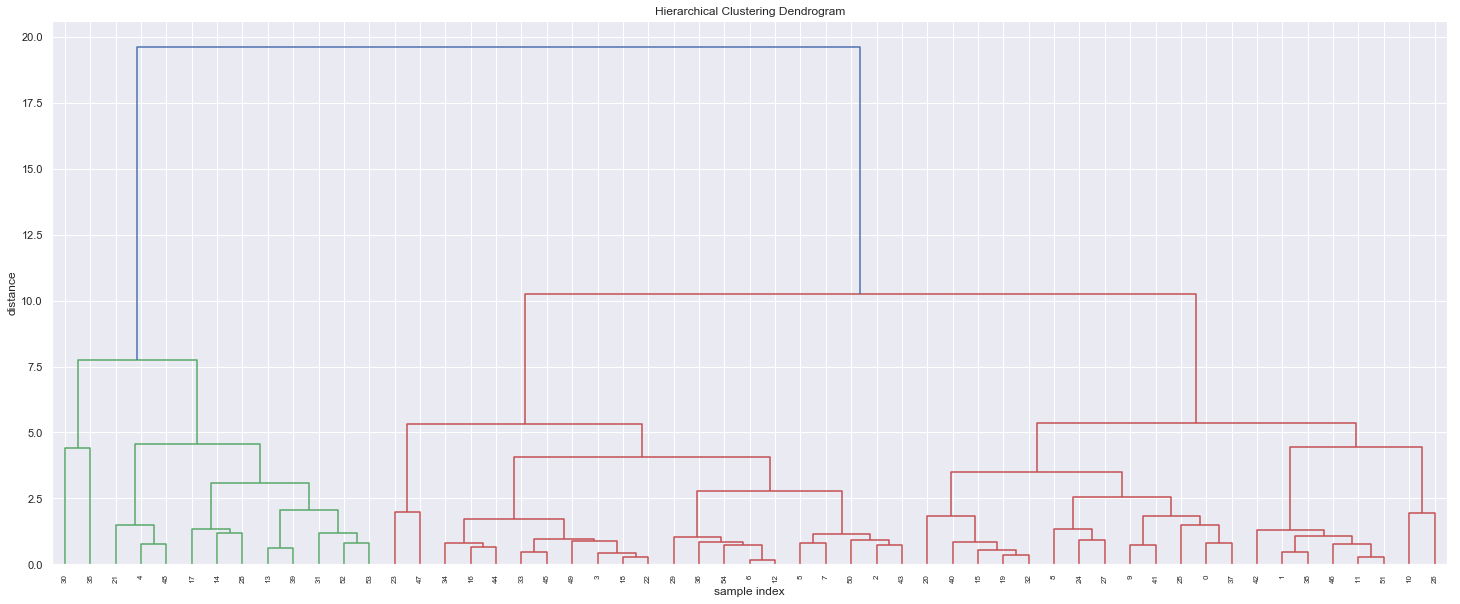

In [19]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

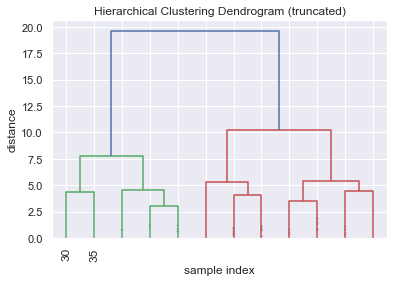

In [20]:
#Truncated dendrogram

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

## Now to find how good my clusters are.

We'll use a few different scoring techniques to examine the quality of our clusters.

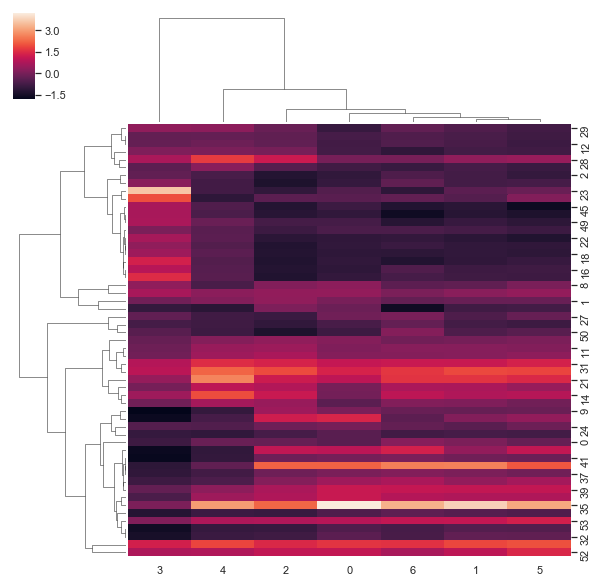

In [43]:
g = sns.clustermap(substd, metric="correlation")

For n_clusters = 2 The average silhouette_score is : 0.5457556488731429
For n_clusters = 3 The average silhouette_score is : 0.4947578890196279
For n_clusters = 4 The average silhouette_score is : 0.47604840272379556
For n_clusters = 5 The average silhouette_score is : 0.34680216825924176
For n_clusters = 6 The average silhouette_score is : 0.33725861488971093


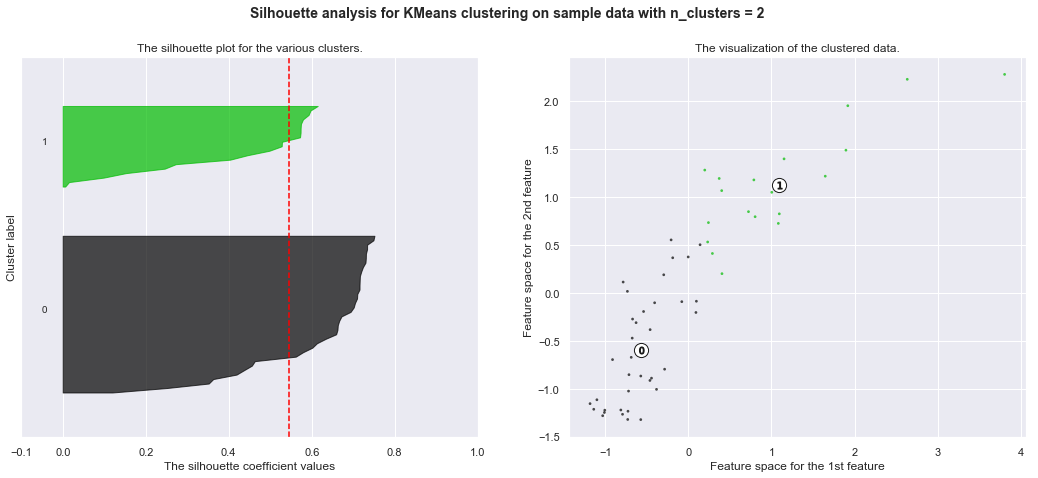

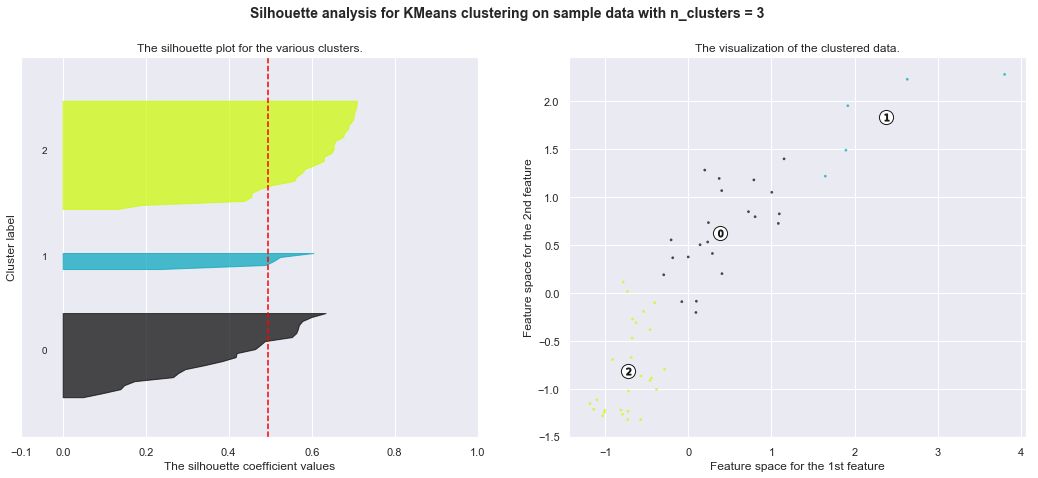

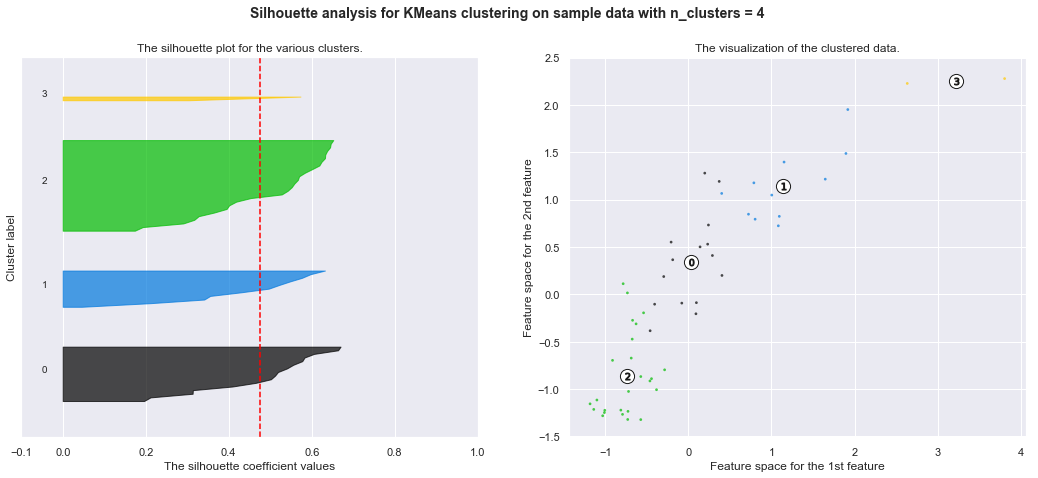

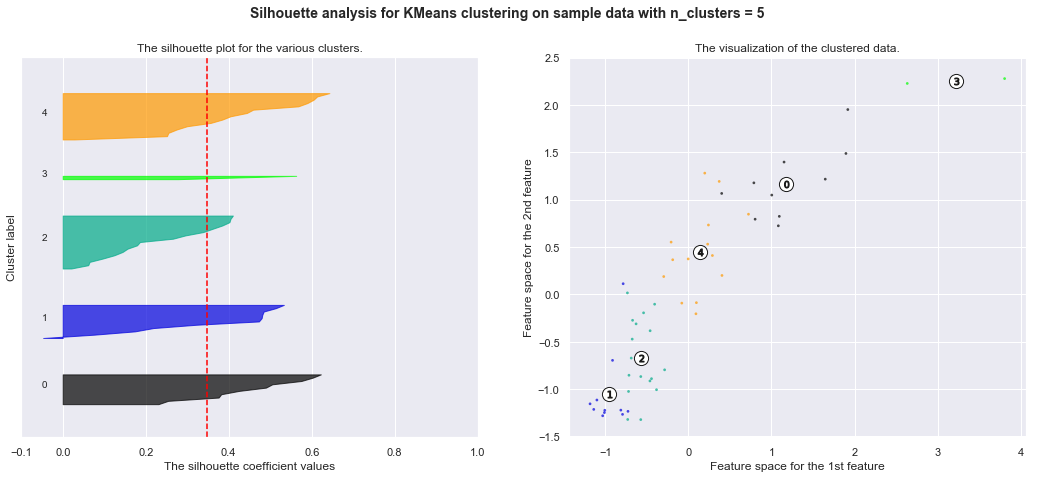

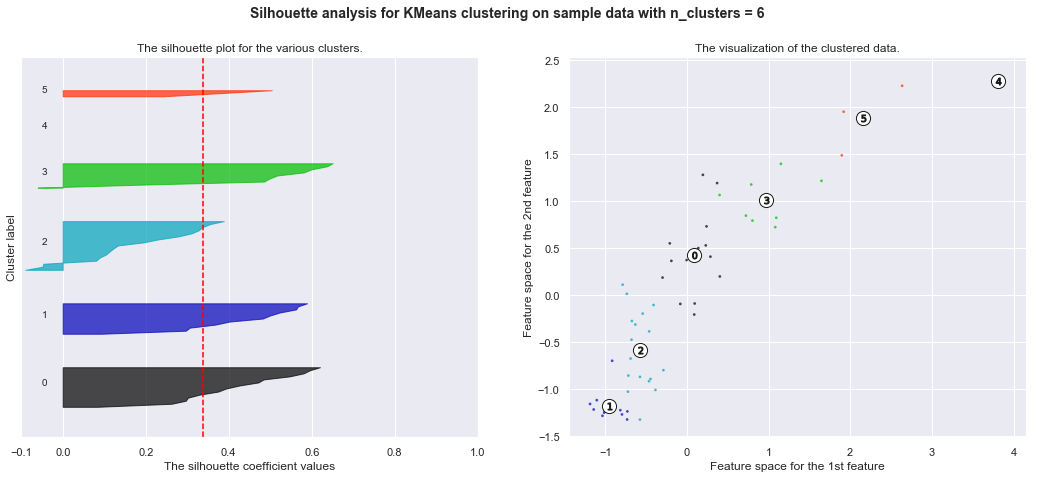

In [69]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.cm as cm

Z= np.array(data[['GBA', 'FIREPLACES', 'ROOMS', 'BATHRM']]).reshape(-1, 4)
y=np.array(data[['AYB']]).reshape(-1, 1)

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Z) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(Z)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Z, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Z, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Z[:, 0], Z[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## I'll go with 3 clusters


In [71]:
from pandas import pivot_table
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(Z)
Xp = subdf[['PRICE', 'GBA', 'FIREPLACES', 'ROOMS', 'BATHRM', 'AYB', 'LANDAREA']]
#Xp=pd.DataFrame(Z, columns =['PRICE', 'GBA', 'FIREPLACES', 'ROOMS', 'BATHRM'])
Xp['Cluster']=kmeans.labels_
table = pivot_table(Xp, index=['Cluster'], values = ['PRICE', 'GBA', 'FIREPLACES', 'ROOMS', 'BATHRM', 'AYB', 'LANDAREA'],aggfunc=np.mean)
table

C:\Users\alehe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,AYB,BATHRM,FIREPLACES,GBA,LANDAREA,PRICE,ROOMS
Cluster,,,,,,,
0,1932.886877,2.644500,1.287709,2256.211898,5091.150954,9.545667e+05,8.247481
1,1945.365640,3.762531,2.061403,3689.327585,9919.864809,1.804369e+06,10.323950
2,1942.130408,1.828355,0.357641,1468.528512,2837.755249,3.953047e+05,6.953848


### Summary of Clusters
Cluster 1 has older and more expensive homes. They don't have as many conveniences as cluster 2 but still command a decent price per square foot.

Cluster 2 has the newest average home year built, with large homes built on massive lots. They seem to have a more open floor plan with an average room size of 357 sq feet.

Cluster 3 has the smallest and most inexpensive homes. It seems like they have the opposite of an "open floor plan" with a lot of rooms but small square footage. Most of them do not have a fireplace.